<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/05_multidimensional_arrays_also_plotting/05_warmup.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# WARMUP | Lesson 05

**Goal**: Plot a timeseries of the annual average number of magnitude 6 (or larger) earthquakes.

In this warmup, you will demonstrate your proficiency in using `pandas` and `matplotlib` for scientific data analysis in a Jupyter notebook.  I am intentionally not providing much guidance in this exercise, leaving it to you to determine the best path to the goal.  That said, I do have some specific instructions:

* download [this CSV](https://raw.githubusercontent.com/taobrienlbl/advanced_earth_science_data_analysis/spring_2023_iub/lessons/05_multidimensional_arrays_also_plotting/data/usgs_major_earthquakes_1900-2023.csv) file containing a dataset of all earthquakes greater than magnitude 6 that USGS has on record since 1900
* utilize Markdown cells extensively to document your thought process, including notes about the CSV file, its origin, etc.
* comment your code extensively
* use git to stage/commit/push this notebook to your course github repository once done (in a lesson 04 folder)
* bonus: if you still have time, also make a plot of # of earthquakes vs month (the seasonal cycle, if there is one)

A note about the CSV file: I obtained it from [a USGS query for magnitude 6 or larger earthquakes globally since 1900](https://earthquake.usgs.gov/earthquakes/map/?extent=-88.71618,-248.20313&extent=88.70033,336.79688&range=search&timeZone=utc&search=%7B%22name%22:%22Search%20Results%22,%22params%22:%7B%22starttime%22:%221900-01-01%2000:00:00%22,%22endtime%22:%222023-09-22%2023:59:59%22,%22minmagnitude%22:6,%22orderby%22:%22time%22%7D%7D) on Friday September 22, 2023 at 10:20am Eastern.  Though USGS ultimately was the source of the data, my search originated from an [NCEI website](https://www.ngdc.noaa.gov/hazel/view/hazards/earthquake/search).  (See the markdown source of this cell for the specific URLs; the USGS query URL contains the specific query parameters.)

I used the CSV download option provided on the website, and the file was downloaded as `query.csv`; I renamed the file to `usgs_major_earthquakes_1900-2023.csv`.

When I download data like this from a web source, I'll often put it in a `data` folder somewhere and will place a `README` (or `README.md`) file in the `data` directory to give information about where I downloaded the data from and any citations that the data provider requests that I use.  I do this because I often come back to datasets like this later on and it isn't always straightforward to find this information after the fact.

# Reading earthquake data from USGS earthquake catalog
This notebook will read earthquake events above magnitude 6.0 from 1900 to 2023.

In [83]:
# import necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt

# a file-link variable containing earthquake data
filepath = 'https://raw.githubusercontent.com/taobrienlbl/advanced_earth_science_data_analysis/spring_2023_iub/lessons/05_multidimensional_arrays_also_plotting/data/usgs_major_earthquakes_1900-2023.csv'

data = pd.read_csv(filepath, \
                   parse_dates=[0], \
                    header=0)
# data.head()

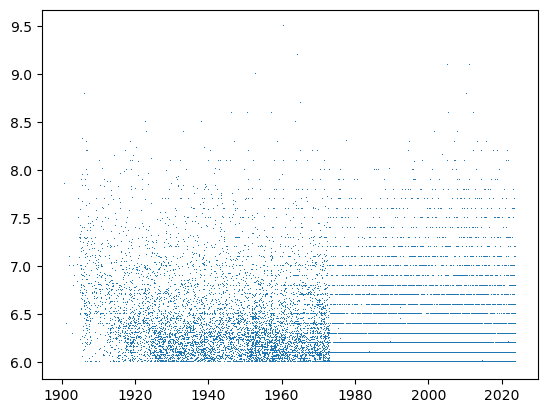

In [84]:
fig, ax = plt.subplots()

ax.plot(data['time'], data['mag'], \
        linestyle=None, linewidth=0, marker=',')
plt.show()

In [85]:
data.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-21 21:11:49.950000+00:00,-14.0039,167.1898,188.419,6.1,mww,76.0,26.0,7.076,0.83,...,2023-09-21T23:17:30.631Z,"41 km WSW of Sola, Vanuatu",earthquake,8.86,4.898,0.054,33.0,reviewed,us,us
1,2023-09-20 14:45:58.609000+00:00,-4.5826,-105.6493,10.000,6.0,mww,110.0,208.0,15.828,1.08,...,2023-09-21T21:02:41.950Z,central East Pacific Rise,earthquake,14.99,1.952,0.050,38.0,reviewed,us,us


In [86]:
# count the number of earthquakes by month for each year and find the average earthquake number for each month
# extract month from time
data['month'] = data['time'].dt.month
data['year'] = data['time'].dt.year
total_years = len(data['year'].unique())
total_years

# count the number of earthquakes by month for each year
# create a list of months
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# group the data by month and count the number of earthquakes for 124 years for each month
monthly_data = data.groupby(by=['month']).count() #.reset_index() 

# monthly_data = pd.DataFrame(monthly_data['time'], index=months)
# make a dataframe with months and earthquake counts
# first, make a dictionary for the dataframe columns
# counts is set to time column, because there are time value for 
# each earthquake. so counting time is counting earthquakes
monthly_dict = {'month': months, 'count': monthly_data['time']} 
                                                    
monthly_eq_counts = pd.DataFrame(monthly_dict, index=None)
monthly_eq_counts.index.name = None

# find the average earthquake number for each month
# total_years = len(data['year'].unique()) which is 124
monthly_eq_counts['avg_count'] = (monthly_eq_counts['count']/total_years).round(2)
monthly_eq_counts

,month,count,avg_count
1,Jan,1094,8.82
2,Feb,1021,8.23
3,Mar,1265,10.20
4,Apr,1200,9.68
5,May,1192,9.61
6,Jun,1088,8.77
7,Jul,1104,8.90
8,Aug,1182,9.53
9,Sep,1196,9.65
10,Oct,1199,9.67


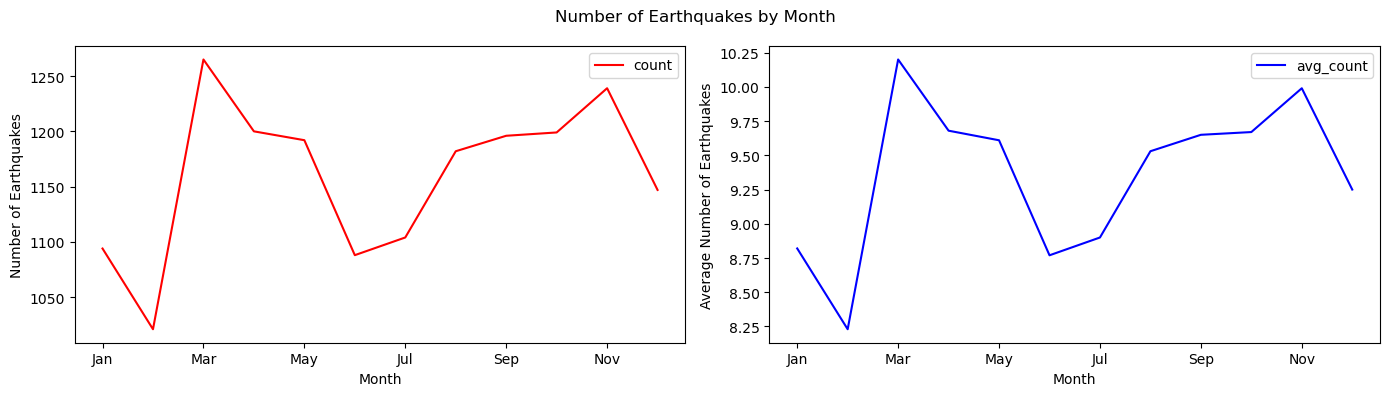

In [87]:
# plot months vs total number of earthquakes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# plot total number of earthquakes
monthly_eq_counts.plot(x='month', y='count', ax=ax1, color='red')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Earthquakes')

# plot average number of earthquakes
monthly_eq_counts.plot(x='month', y='avg_count', ax=ax2, color='blue')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Number of Earthquakes')

# set title and legend
fig.suptitle('Number of Earthquakes by Month')
ax.legend(['Total', 'Average'])
plt.tight_layout()
plt.show()
